<img src="https://drive.google.com/uc?export=view&id=1uDiRDsBQS2OijoIu83KvnqRfAOlToUk2" style="width: 200px;"/>

# Computer Vision
##### Dominik Kuczkowski

Description:

In this notebook you will learn how to train a handwritten digit classifier.
You will use data from MNIST database, which contains images of digits from 0 to 9. You will utilize Convolutional Neural Network to solve that task. At the end you will have a chance to create your own network.

<a href="TODO">Run in Google Colab</a>
## Table of Contents 
**[1. Handwritten digit classifier](#1.-Section-1)<br>**
&nbsp;&nbsp;&nbsp;&nbsp;[1.1 MNIST dataset](#1.1-Subsection-1.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Neural Network](#1.2-Subsection-1.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.3 Training the model](#1.3-Subsection-1.3)<br>
**[2. Task](#2.-Section-2)<br>**

---
<a name="1.-Section-1"></a>
# 1. Handwritten digit classifier

In this section you will learn:
 - how to load MNIST dataset
 
 - how to create a simple CNN in Keras
 
 - how to train and evaluate the network

 To code below imports all required libraries.

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

<a name="1.1-Subsection-1.1"></a>
## 1.1 MNIST dataset

[MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. It is a very popular dataset for creating your first CNN classifier. We will use methods available in Keras to load it.

In [ ]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


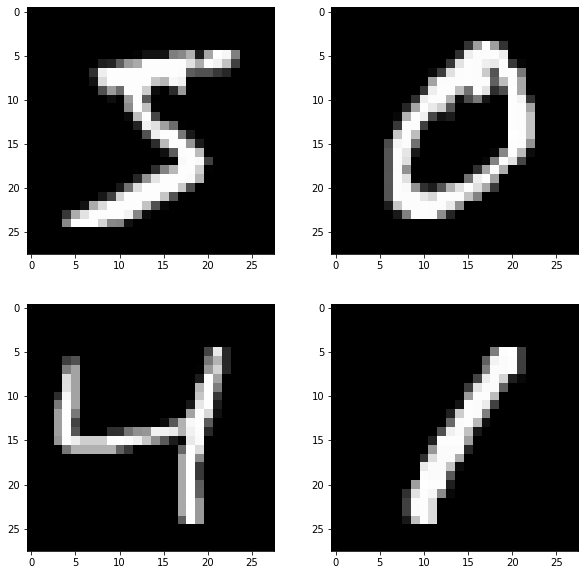

In [ ]:
# Let's visualize some of the data
import matplotlib.pyplot as plt

# We need to create a figure
fig = plt.figure(figsize=(10, 10))

# Then we have to add subplots to the figure and plot the images
fig.add_subplot(2, 2, 1)
plt.imshow(x_train[0], cmap='gray')

fig.add_subplot(2, 2, 2)
plt.imshow(x_train[1], cmap='gray')

fig.add_subplot(2, 2, 3)
plt.imshow(x_train[2], cmap='gray')

fig.add_subplot(2, 2, 4)
plt.imshow(x_train[3], cmap='gray')

As we can see the images are in grayscale. What other properties do these images have? Let's find out. 

In [ ]:
# Train dataset
print(f"The train part of the dataset contains: {x_train.shape[0]} images")
# Test dataset
print(f"The test part of the dataset contains: {x_test.shape[0]} images")
# One image
print(f"Shape of one image is: {x_train[0].shape}")
print(f"Data type of the images is: {x_train[0].dtype}")
print(f"Max value of images is: {x_train.max()} and min value of images is: {x_train.min()}")

The train part of the dataset contains: 60000 images
The test part of the dataset contains: 10000 images
Shape of one image is: (28, 28)
Data type of the images is: uint8
Max value of images is: 255 and min value of images is: 0


So we have checked other properties of the dataset. We now know that there are 60000 images in the train set and 10000 images in the test set. The images are 28 pixels wide and 28 pixel high. They are represented as 8 bit unsigned integers,so they can hold values from 0 to 255.

Neural Networks in general require data to be in range [-1, 1] or [0, 1]. Also GPU's that are mostly used during neural network training are more optimized towards operations on floating point numbers. Because of that we have to do some preprocessing on our data.

In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)


# The last thing we need to do:
# change labels represantation from int to vectors with 1 in place which index corresponds to the digit
# e.g. label for digit 5 -> [0,0,0,0,0,1,0,0,0,0]
num_classes = 10 # we have 10 digits
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)


<a name="1.2-Subsection-1.2"></a>
## 1.2 Neural Network


It's time to create the model. We will use Keras Sequential API that enables quick and easy creation on Neural Network models.

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # This is the convolution layer that was described on the meeting, it has relu activation function
        layers.MaxPooling2D(pool_size=(2, 2)), # This is the pooling layer, it 
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5), # This layer randomly disabled some of the neurons
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

<a name="1.3-Subsection-1.3"></a>
## 1.3 Training the model


We now have almost all of the elements required for model training. The data is loaded and the model is defined. Last thing we need to do is to compile the model. During that we determine which loss function we would like to use and what optimizer will be used to update the parameters. Also we determine the type of metrics that will be used to evaluate our model.



In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Now we can train the model. Keras has a very simple way of doing that. You only need to call the method fit with some parameters.

In [ ]:
batch_size = 128 # Training data will be spli in chunks of this size that will be passed through the network at the same time
epochs = 10 # During one epoch the model 'sees' all of the training data, with this parameter we determine how many times the model will be allowed to see them
validation_split = 0.1 # Determines what percentage of training data will be used to validate the model after each epoch
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split)

Epoch 1/4
422/422 [==============================] - 11s 6ms/step - loss: 0.3842 - accuracy: 0.8802 - val_loss: 0.0922 - val_accuracy: 0.9745
Epoch 2/4
422/422 [==============================] - 2s 5ms/step - loss: 0.1210 - accuracy: 0.9629 - val_loss: 0.0585 - val_accuracy: 0.9827
Epoch 3/4
422/422 [==============================] - 2s 5ms/step - loss: 0.0902 - accuracy: 0.9723 - val_loss: 0.0488 - val_accuracy: 0.9853
Epoch 4/4
422/422 [==============================] - 2s 5ms/step - loss: 0.0756 - accuracy: 0.9772 - val_loss: 0.0447 - val_accuracy: 0.9872


With the model trained we can visualize values of metrics collected during trainig to better understand what happend.

Text(0.5, 1.0, 'Loss')

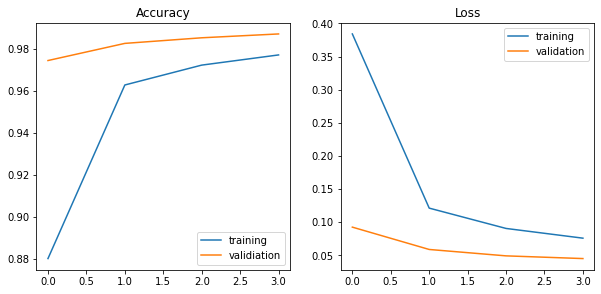

In [ ]:
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
acc = history.history['accuracy']

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(2, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.legend(['training', 'validiation'])
plt.title("Accuracy")

fig.add_subplot(2, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['training', 'validation'])
plt.title("Loss")


With the model trained we can check how it classifies the test data. To do that we will use another method from Keras: evaluate().

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04773509502410889
Test accuracy: 0.9843000173568726


Accuracy on test set is very high. This means that our model is classifying digits very well. To finish this notebook let's look at our model's outputs.

1/1 [==============================] - 0s 15ms/step
Predicted label is: 1, actual label is: 1


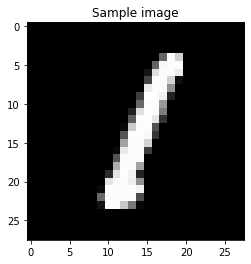

In [ ]:
ind = np.random.randint(x_test.shape[0]) # Generate random index
image = x_test[ind] # Select image with the random index
label = y_test[ind] # Select corresponding label

# Pass the image through the network. 
# Because the model expects to get data in batches, np.expand_dims() adds one additional dimension to the image
# Now the image has dimensions (1, 28, 28, 1)
y_pred = model.predict(np.expand_dims(image, 0)) 

# Plotting the image, this time without any dimensions equal to 1
# np.squeeze() removes these
plt.imshow(np.squeeze(image), cmap='gray')
plt.title("Sample image")

# Print the predicted and actual label. Predictions are in form of vectors with probabilities,,
# so the index of the highest probility should be the number from the image.
print(f"Predicted label is: {np.argmax(y_pred)}, actual label is: {np.argmax(label)}")

---
<a name="2.-Section-2"></a>
# 2. Task: create a classifier for CIFAR10 dataset

CIFAR10 is a dataset that contains images from 10 different classes. The classes are: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. Based on the code above experiment with this dataset.
Try to visualize the different classes. Create a classifier for them. Try to change neural network parameters and look what happens. Wish you luck.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
# Place your code here













---

This notebook is a part of introductory machine learning course, led by the [Gradient](https://gradient.eti.pg.gda.pl/) science club in the 2022/2023 school year.

<img src="https://drive.google.com/uc?export=view&id=1P7SX6J_GWlS1ENxVaZCcBO0BxHP6ULEg" width="1050"/>